# Inventory-Daten der Seattle Public Library


## Meine Fragen an die vorliegenden Daten:

1. Wie sind die verschiedenen "itemtypes" verteilt?
2. Wie sieht die Verteilung der Genres ("itemcollection") aus?
3. Wieviele Comics hat die Seattle Public Library?
4. Wieviele Items sind ein "Floating Item"?
5.

### Vorbereitungen zur weiteren Bearbeitung

Als Basis zur Darstellung und Bearbeitung der Daten kommen zunächst einmal die benötigten "Libraries" hinzu.
Dann hole ich mir die Daten mittels der URL in mein Jupyter-Notebook und vergebe im nächsten Schritt die Variable "invent" für die Tabelle.

In [63]:
import urllib.request

In [64]:
import pandas as pd

In [65]:
import matplotlib.pyplot as plt

In [66]:
import numpy as np

In [67]:
# magic-key zum Anzeigen der Grafiken im Jupyter Notebook
%matplotlib inline

In [68]:
url= "https://data.seattle.gov/resource/6vkj-f5xf.csv"
seattle_inventory = "lokale-inventory.csv"

In [69]:
urllib.request.urlretrieve (url, seattle_inventory)

('lokale-inventory.csv', <http.client.HTTPMessage at 0x38e762688>)

In [70]:
invent = pd.read_csv (seattle_inventory)

Dann lasse ich mir die Tabelle anzeigen und auch in einem nächsten Schritt die Beschriftung der "columns", also der Spalten.

In [71]:
invent

,bibnum,title,author,isbn,publicationyear,publisher,subjects,itemtype,itemcollection,floatingitem,itemlocation,reportdate,itemcount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3079977,Pacific Northwest road trip / Allison Williams.,"Williams, Allison, 1972-","1612387624, 9781612387628",c2015.,"Avalon Travel,",Automobile travel Northwest Pacific Guidebooks...,acbk,nanf,NaN,mag,2017-09-01T00:00:00.000,1
996,2927841,"Marriages of Bute and Warren Counties, North C...","Holcomb, Brent H.","0806313013, 9780806313016","2004, c1991.","Clearfield Pub. Co.,","Marriage records North Carolina Bute County, M...",arbk,caref,NaN,cen,2017-09-01T00:00:00.000,1
997,3139193,All paws on deck / by Jessica Young ; illustra...,"Young, Jessica (Jessica E.)","0545818869, 0545818877, 9780545818865, 9780545...",2015.,"Branches/Scholastic Inc.,","Great Dane Juvenile fiction, Scottish terrier ...",jcbk,ncef,NaN,net,2017-09-01T00:00:00.000,1
998,3129641,The amazing Spider-man. Renew your vows / writ...,"Slott, Dan","0785198865, 9780785198864",[2015],"Marvel Comics,",Spider Man Fictitious character Comic books st...,acbk,cycomic,NaN,cen,2017-09-01T00:00:00.000,1


In [72]:
invent.columns

Index(['bibnum', 'title', 'author', 'isbn', 'publicationyear', 'publisher',
       'subjects', 'itemtype', 'itemcollection', 'floatingitem',
       'itemlocation', 'reportdate', 'itemcount'],
      dtype='object')

### 1. Frage: Wie sind die verschiedenen "itemtypes" verteilt?

In der entsprechenden Spalte "itemtype" wird zwischen einigen Abkürzungen unterschieden. Zur Bedeutung einiger Abkürzungen: acbk (adult book), jcbk (children's book), accd (adult CD), acdvd (adult DVD) usw.
Zur Defintion der Abkürzungen: https://data.seattle.gov/Community/Integrated-Library-System-ILS-Data-Dictionary/pbt3-ytbc

Mich interessiert, wie genau diese verteilt sind. Dazu zähle ich zunächst die Verteilung auf die einzelnen "itemtypes".

In [73]:
invent ["itemtype"].value_counts ()

acbk     463
jcbk     258
arbk      90
accd      79
acdvd     63
acmus     22
jcdvd     20
jccd       3
acmap      1
armus      1
Name: itemtype, dtype: int64

Diese Verteilung möchte ich mir als Säulendiagramm anzeigen lassen.

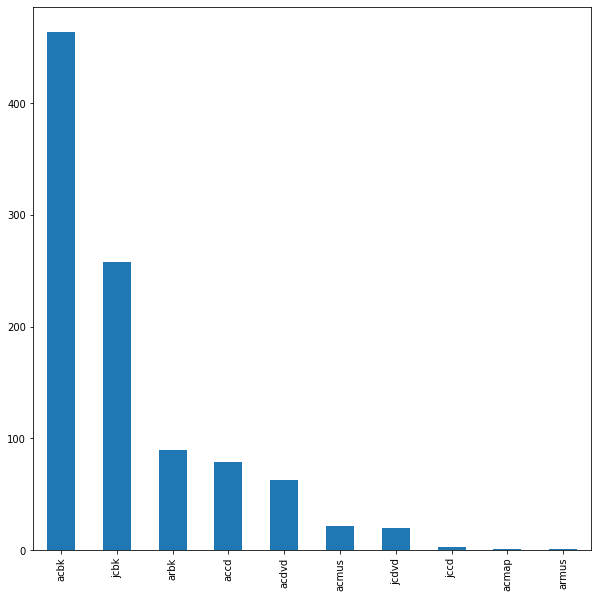

In [74]:
itemtypes = ['acbk', 'jcbk', 'arbk', 'accd', "acdvd", 'acmus', 'jcdvd', 'jccd', 'acmap', 'armus']
series = pd.Series ([463, 258, 90, 79, 63, 22, 20, 3, 1, 1],
                   index=itemtypes,
                   name='itemtypes')
series.plot.bar(figsize = (10, 10))

Sehr deutlich zu sehen:
Von 999 "items" aus der Tabelle fallen 463 in die Kategorie Erwachsene (acbk) und 258 in die Kategorie Kinder (jcbk). Prozentual betrachtet: 46,3% Erwachsenenliteratur und 25,8% Kinderbücher.
Die restlichen 27,9% des Inventars der Seattle Public Library verteilen sich dann auf die anderen "itemtypes".

### 2. Frage: Wie sieht die Verteilung der Genres ("itemcollection") aus?

Nun interessieren mich die bei der Seattle Library vorhandenen Genres. Dazu schaue ich mir die Spalte "itemcollection" genauer an. Auch hier zähle ich zunächst die Verteilung auf einzelne Abkürzungen der "itemcollection".

In [75]:
invent ["itemcollection"].value_counts ()

canf       149
nanf        94
ncpic       57
ncnf        51
nafic       46
          ... 
cawest       1
nahol        1
calndvd      1
ncbocd       1
ccfft        1
Name: itemcollection, Length: 95, dtype: int64

Über https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf lassen sich die Abkürzungen (collection inventory codes) nachschauen: canf (CA-Nonfiction), nanf (NA-Nonfiction), ncpic (NC-Children's picture books), ncnf (NC-Children's Nonfiction), nafic (NA-Fiction) usw.

Die Erkenntisse aus der Zählung der einzelnen Genrezuteilung ("itemcollection") möchte ich mir nun als Diagramm darstellen lassen. Ich beschränke mich hier auf die ersten 5 Werte.

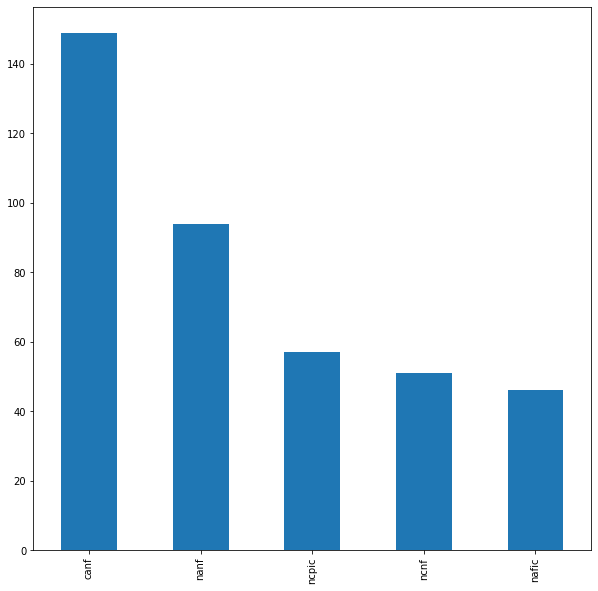

In [76]:
itemtypes = ['canf', 'nanf', 'ncpic', 'ncnf', 'nafic']
series = pd.Series ([149, 94, 57, 51, 46],
                   index=itemtypes,
                   name='itemtypes')
series.plot.bar(figsize = (10, 10))

Auch bei dieser Fragestelltung zeigt sich die deutliche Fokussierung auf Erwachsenenliteratur bzw. deren Genres. Außerdem kann man feststellen, dass das Inventar der Seattle Public Library zu 24,3% aus "Nonfiction", also Sachbüchern besteht (canf und nanf zusammengenommen).

### 3. Frage: Wieviele Comics hat die Seattle Public Library?

Bei Betrachtung der Spalte "subjects" fallen mir schon ein paar Comics auf. Mich interessiert, wieviele Comics bei den "subjects" zu finden sind.

Da es sich bei "Comic" in dieser Spalte um einen String und nicht um einen fest definerten Begriff wie etwa "canf" bei "itemtypes" handelt, muss ich folgendermaßen vorgehen:
Ich muss zählen, wie oft der String "Comic" in der Spalte "subjects" vorkommt. Wörtlich lautet der Befehl also: Zeige mir nur die Zeilen der Tabelle an, in denen der String "Comic" vorkommt und nenne mir die Form bzw. Ausmaße der neuen Tabelle.

Im ersten Anlauf klappt es nicht. Ich benötige noch eine Flag (na=False). Dazu finde ich Hilfe: https://stackoverflow.com/questions/28311655/ignoring-nans-with-str-contains

In [77]:
# invent[invent["subjects"].str.contains("Comic")].shape

invent[invent["subjects"].str.contains("Comic", na=False)].shape

(35, 13)

Die Tabelle enthält 35 Zeilen (und 13 Spalten), die den String "Comic" enthalten. Man kann also schlussfolgern, dass das Inventar der Seattle Library 35 Comics bereithält.

Leider ist eine grafische Darstellung dieses Ergebnisses nicht möglich.

### 4. Frage: Wieviele Items sind ein "Floating Item"?

Die Seattle Public Library hält einige "Floating items" bereit. Zur Erklärung:
"Floating materials are not owned by a specific branch and become a part of the collection at the branch to which they are returned. These items spend less time in delivery and allow us to refresh collections at different branches. The library collection, with the exception of periodicals and non-circulating reference materials, is a floating collection." (https://askthelibrary.fairfaxcounty.gov/faq/190647)

Dazu zähle ich wie oft der Begriff "Floating" (im Gegensatz zu "NaN") in der Spalte "floatingitem" vorkommt.
Ich möchte dieses Ergebnis gerne als Tortendiagramm darstellen.

In [79]:
floating = invent.loc[invent['floatingitem'] == 'Floating'].count()[0]

floating

150

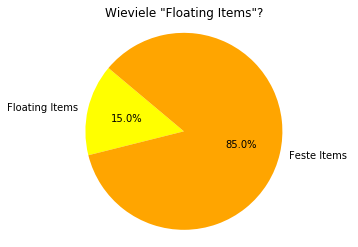

In [91]:
labels = ['Floating Items', 'Feste Items']
sizes = [150, 849]
colors = ['yellow', 'orange']

plt.pie(sizes,              
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        shadow=False,        
        startangle=140)

plt.title('Wieviele "Floating Items"?')

plt.axis('equal')

plt.show()

### 5. Frage:

